# Producing maps with the Basemap library

We can be more flexible than that and plot the same data in many different projections using a Python/Matplotlib library called [Basemap](http://matplotlib.org/basemap/).

## Objectives
1. To get an overview of different map projections
1. To learn how to use the Basemap library to plot data in different projections

## Map projections

A full discussion of map projections is beyond the scope of this practical, but you can see [this article](http://en.wikipedia.org/wiki/Map_projection) on Wikipedia for a good overview. Basically, map projections may be designed to preserve different properties:

* **Equal-area** projections preserve *area* so that one pixel on the screen represents the same area of the Earth's surface everywhere on the map. The [Sinusoidal](http://matplotlib.org/basemap/users/sinu.html) projection is an example of this.
* **Conformal** projections preserve *shape* locally so that circles on the Earth's surface are circles on the map. An example of this is the [Stereographic](http://matplotlib.org/basemap/users/stere.html) projection.
* **Equidistant** projections preserve *distance* from a standard point or points on the map, for example the typical [Equidistant Cylindrical](http://matplotlib.org/basemap/users/cyl.html) (latitude-longitude or Plate Carrée) projection or the [Azimuthal Equidistant](http://matplotlib.org/basemap/users/aeqd.html) projection.
* The [Mercator](http://matplotlib.org/basemap/users/merc.html) projection has the property that straight lines on the map between any two points can be directly translated to compass bearings, making navigation easy (which is why Google Maps uses a Mercator projection).
* The [Perspective](http://matplotlib.org/basemap/users/nsper.html) projection represents a view of the Earth from space. The [Geostationary](http://matplotlib.org/basemap/users/geos.html) projection is a special case of this, representing a view from geostationary orbit. The [Orthographic](http://matplotlib.org/basemap/users/ortho.html) projection represents a view of the Earth from an infinite distance. 

The key points are:
1. There is no map projection that preserves all these quantities (area, shape or distance) everywhere on the map. Therefore the choice of map projection depends on what you want to show. If you are showing areal statistics, you will probably want an area-preserving projection otherwise your data will distort the truth. (Commonly-used projections such as latitude-longitude or Mercator projections severely exaggerate the apparent size of land masses at high latitudes.)
1. The commonly-used latitude-longitude projection does not preserve area or shape, and it is not very useful for navigation, so it is often derided by cartographers. Bear this in mind when producing plots and consider using a better projection if appropriate.

## How to use the Basemap library
We will work through how to use Matplotlib's [Basemap](http://matplotlib.org/basemap/) library to produce map plots in different projections. We start by importing some libraries, many of which are exactly the same as in previous lessons.

In [6]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# These lines are needed to make matplotlib plot figures inline and at a decent size.
# They are not needed in scripts.
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# Then we read some data from a file in the same way as we did in the previous lesson:
nc = Dataset('./data/maps/pottmp.2014.1time.nc')
pottmp = nc.variables['pottmp']
lons = nc.variables['lon'][:]
lats = nc.variables['lat'][:]
# Creates a 2d field by slicing at the first vertical level and timestep
data = pottmp[0,0] 

Now we create the Basemap object itself, using an Orthographic projection (because it looks nice). To use different map projections, edit this line according to the Basemap documentation (see the Exercise below):

In [7]:
m = Basemap(projection='ortho', lon_0=-50, lat_0=40, resolution='l')

Here comes the tricky bit. We have to create a grid of latitude and longitude values, then convert them all to map projection coordinates. Note that the Basemap object (called m here) is acting as a function that translates lat-lon to x-y coordinates. Don't worry if you don't understand this:

In [8]:
X,Y = np.meshgrid(lons, lats)
x,y = m(X,Y)

Now we can create the plot. This is very much like how we would do this in "plain" Matplotlib, except that we use m.contourf() instead of plt.contourf(). We also add a nice background (the NASA Blue Marble image), plus a map boundary and coastlines. Finally we add a colour bar.

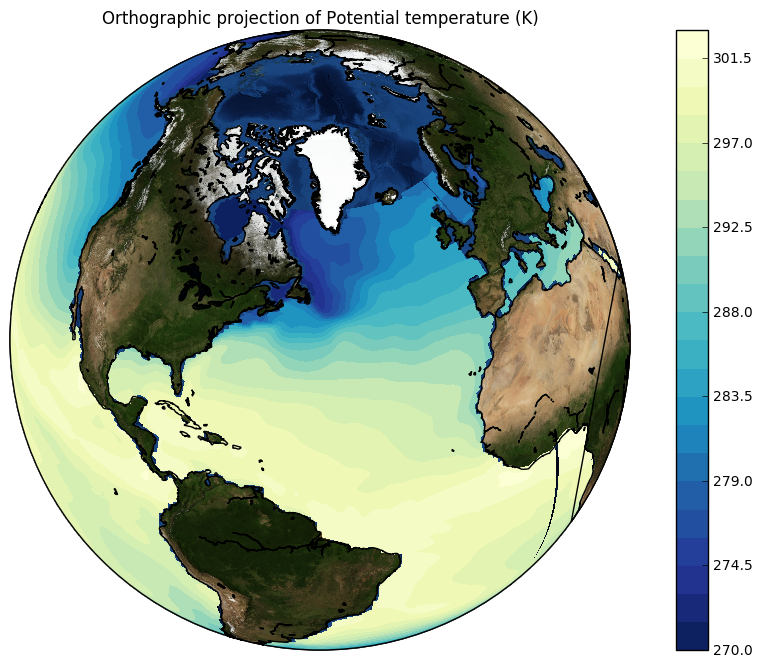

In [9]:
pc = m.contourf(x, y, data, 30, cmap=plt.get_cmap('YlGnBu_r'))
m.bluemarble()
m.drawmapboundary()
m.drawcoastlines()
plt.title('Orthographic projection of ' + pottmp.long_name + ' (' + pottmp.units + ')')
plt.colorbar(pc, orientation='vertical')
plt.show()

## Next Steps

* [Geospatial data with Python](http://nbviewer.ipython.org/github/mqlaql/geospatial-data/blob/master/Geospatial-Data-with-Python.ipynb)
* [Mapping global earthquake activity](http://nbviewer.ipython.org/github/ehmatthes/intro_programming/blob/master/notebooks/visualization_earthquakes.ipynb) - this contains examples of plotting points on maps. You can use this to plot, for example, the locations of observation on a map.


### PS:
A sample script that contains these steps is given in `plotmap.py`. Using the list of map projections that Basemap supports, and instructions on how to use them (given [here](http://matplotlib.org/basemap/users/mapsetup.html)), plot the data in a variety of different map projections. You should only have to edit one of the lines in the script. Of course, you can also adjust the colour map being used and other parameters of the plot.
